In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Amazon Sale Report.csv')
print(df.head())


   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ... currency  Amount    ship-city   ship-state  \
0            Set  ...      INR  647.

/tmp/ipython-input-1942285686.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Amazon Sale Report.csv')


In [7]:
print(df.isnull().sum())
df = df.drop_duplicates()
df['Qty'] = df['Qty'].fillna(0)
df['Amount'] = df['Amount'].fillna(0)
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y')
df['Revenue'] = df['Qty'] * df['Amount']

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                    0
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
Revenue                   0
dtype: int64


In [8]:
total_revenue = df['Revenue'].sum()
print(f"Total Revenue: ${total_revenue:.2f}")
total_orders = df['Order ID'].nunique()
print(f"Total Orders: {total_orders}")
total_quantity = df['Qty'].sum()
print(f"Total Products Sold: {total_quantity}")
category_revenue = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)
print(category_revenue)

Total Revenue: $76034406.00
Total Orders: 120378
Total Products Sold: 116649
Category
Set              37934434.0
kurta            20675349.0
Western Dress    10707932.0
Top               5242931.0
Ethnic Dress       762949.0
Blouse             441259.0
Bottom             142870.0
Saree              125767.0
Dupatta               915.0
Name: Revenue, dtype: float64


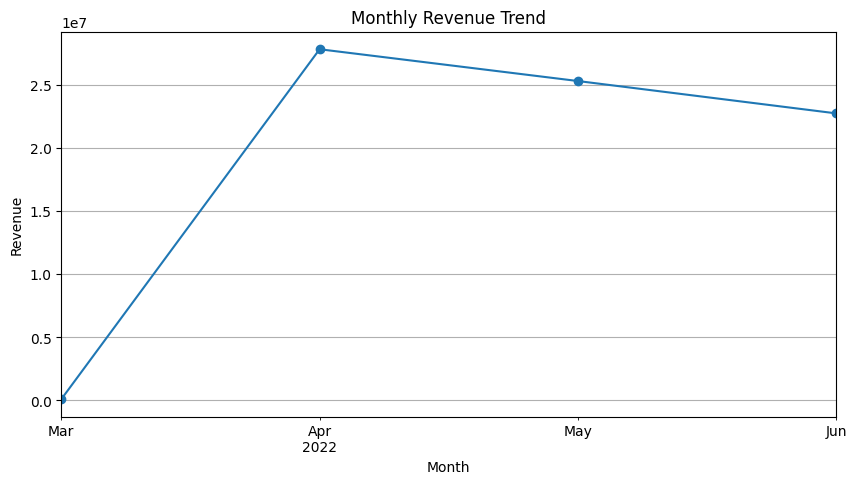

In [10]:
df['YearMonth'] = df['Date'].dt.to_period('M')
monthly_revenue = df.groupby('YearMonth')['Revenue'].sum()
plt.figure(figsize=(10,5))
monthly_revenue.plot(marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

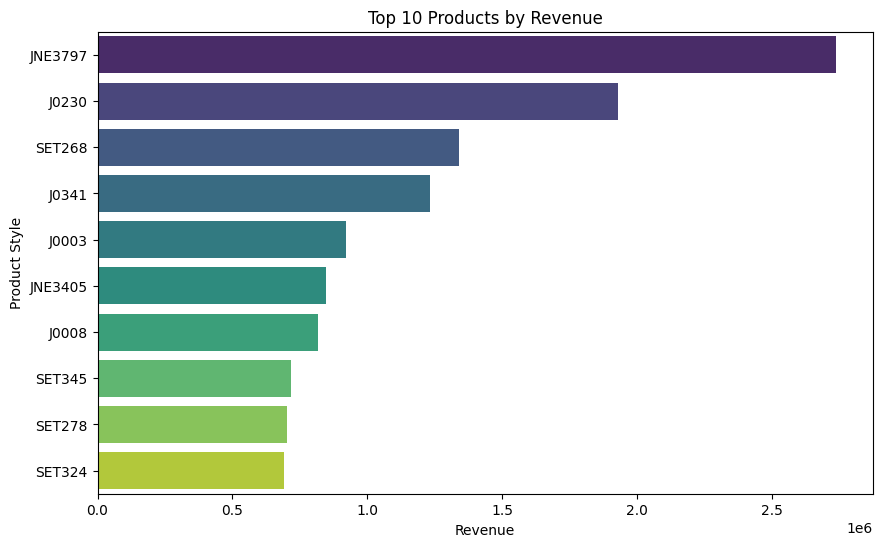

In [14]:
top_products = df.groupby('Style')['Revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, palette='viridis', legend=False)
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product Style')
plt.show()

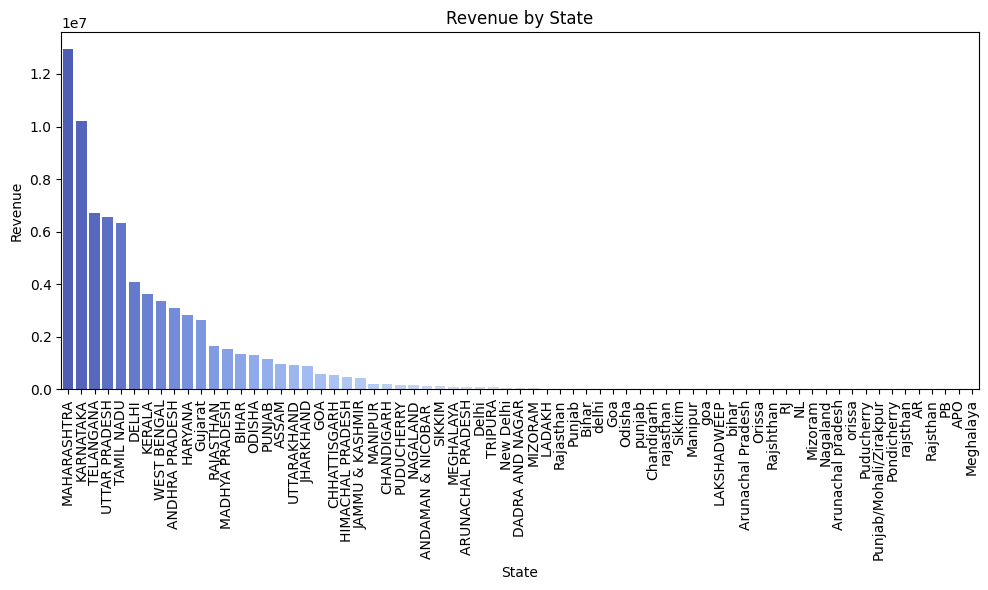

In [17]:
region_revenue = df.groupby('ship-state')['Revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=region_revenue.index, y=region_revenue.values, hue=region_revenue.index, palette='coolwarm', legend=False)
plt.title('Revenue by State')
plt.xlabel('State')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

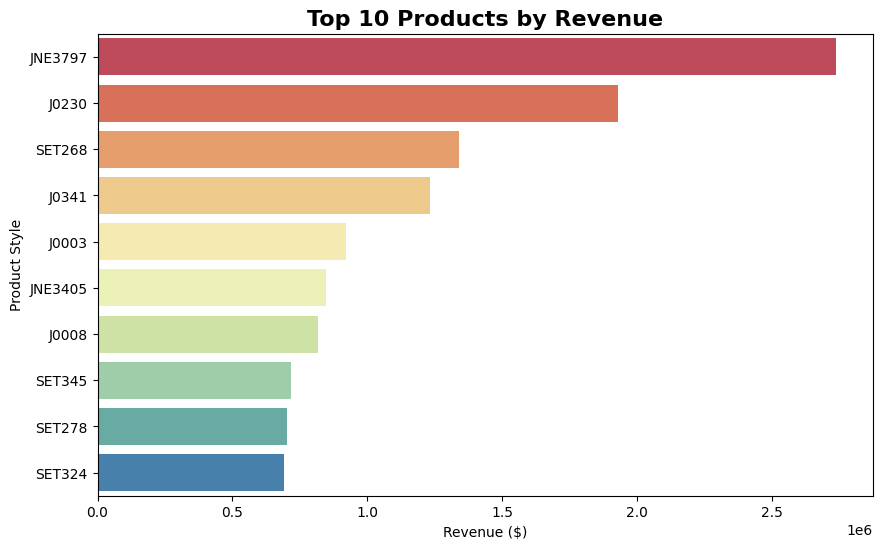

In [19]:
top_products = df.groupby('Style')['Revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, palette='Spectral', legend=False)
plt.title('Top 10 Products by Revenue', fontsize=16, weight='bold')
plt.xlabel('Revenue ($)')
plt.ylabel('Product Style')
plt.show()